### Import Packages 

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
Data = pd.read_csv ('C:/Users/krrish/Documents/projects/black friday project/train/train.csv')

In [3]:
Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
## dimensions of the dataset
Data.shape

(550068, 12)

## Visualization

##### Comment : As we know that "Product Id" and "User_ID" both are not usable for eda ,so we drop them. 

In [5]:
Data.drop (columns = ['User_ID', 'Product_ID'], inplace = True)

In [6]:
Data ['Gender'].value_counts(dropna = False)

M    414259
F    135809
Name: Gender, dtype: int64

In [7]:
Data ['Age'].value_counts(dropna = False)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Text(0.5, 1.0, 'Diversity of the Ages of Customers.')

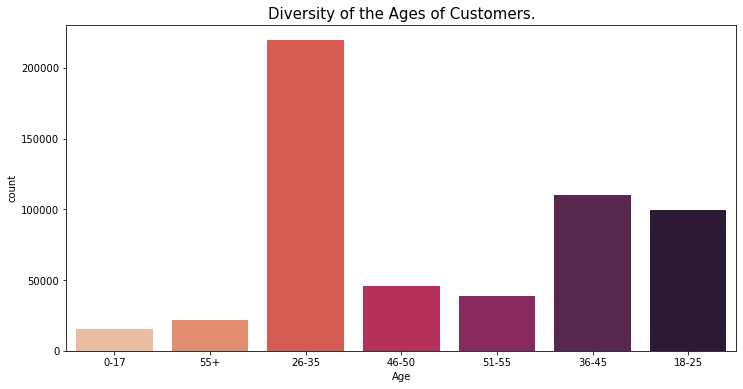

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age',data=Data, palette='rocket_r')
plt.title("Diversity of the Ages of Customers.", size =15)

ANALYSIS: As per the above analysis, we can see various age groups, but the youth are participating the most.


In [9]:
Data ['Product_Category_1'].value_counts(dropna = False)

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

<AxesSubplot:>

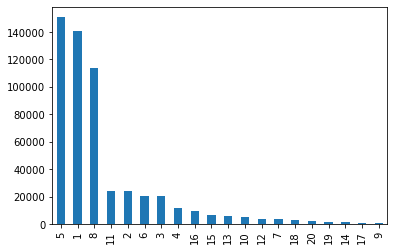

In [10]:
Data ['Product_Category_1'].value_counts().plot(kind ='bar')

Comment : As per the above analysis category 5 of 'Product_Catergory_1' has the maximum count which is 150933 and category 9 has the minimum count which is 410. As of now we cannot assume that which kind of product falls under this category.

<AxesSubplot:>

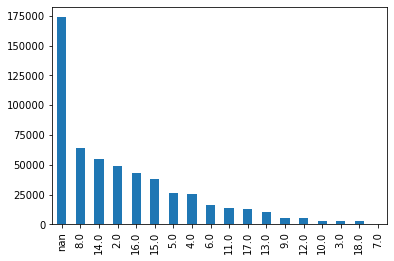

In [11]:
Data ['Product_Category_2'].value_counts(dropna = False).plot (kind ='bar')

<AxesSubplot:>

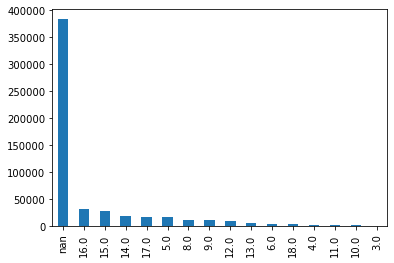

In [12]:
Data ['Product_Category_3'].value_counts(dropna = False).plot(kind = 'bar')

ANALYSIS : As per the above 2 graph's analysis, we can see that the maximum count of product categories are unknown, filled with NaN, means these are missing values. We can replace null values with a special number so as to predict the data correctly. We cannot drop the null values here.

C:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Plotting the Purchase during the Black Friday sale.'}, xlabel='Purchase', ylabel='Density'>

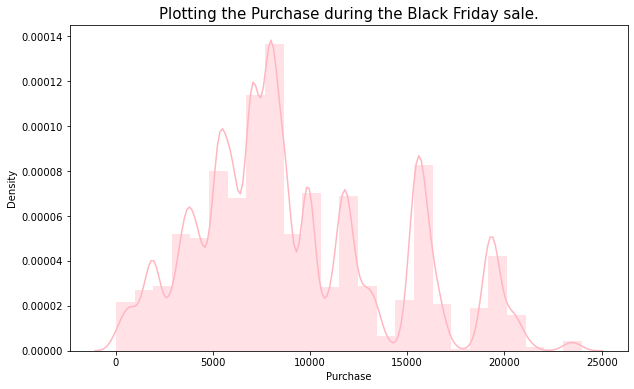

In [13]:
plt.figure(figsize=(10, 6))
plt.title('Plotting the Purchase during the Black Friday sale.', size = 15)
sns.distplot(Data['Purchase'], bins=25 , color ='lightpink')

this plot is representing that maximum purchase is between 5000-10000.

Text(0.5, 1.0, 'Types of cities regarding customers.')

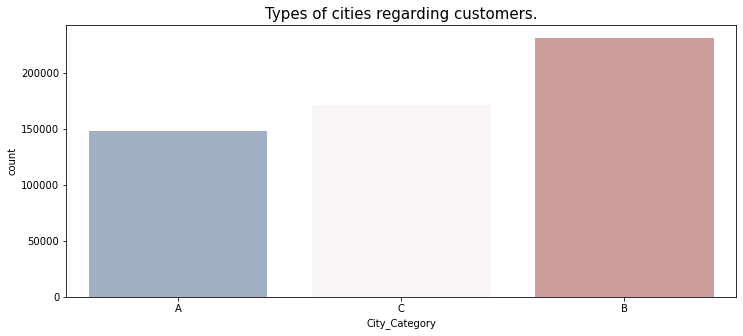

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='City_Category',data=Data, palette='vlag')
plt.title("Types of cities regarding customers.", size =15)

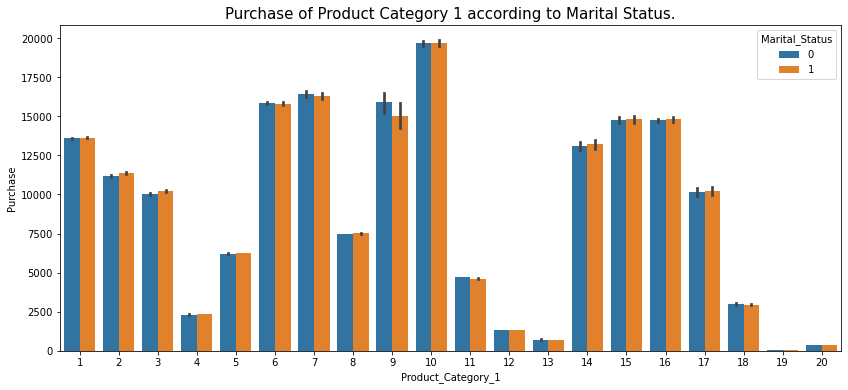

In [15]:
plt.figure(figsize=[14,6])

sns.barplot(data=Data,x='Product_Category_1',y='Purchase',hue='Marital_Status')

plt.title("Purchase of Product Category 1 according to Marital Status.", size =15)

plt.show()

Text(0.5, 1.0, 'Staying in the city for years more than...')

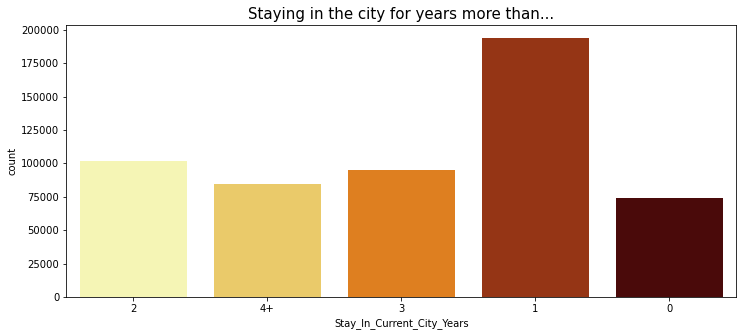

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x='Stay_In_Current_City_Years',data=Data, palette='afmhot_r')
sns.set_context('notebook')
plt.title("Staying in the city for years more than...", size =15)

Text(0.5, 1.0, 'Ratio of Purchase Made By Gender')

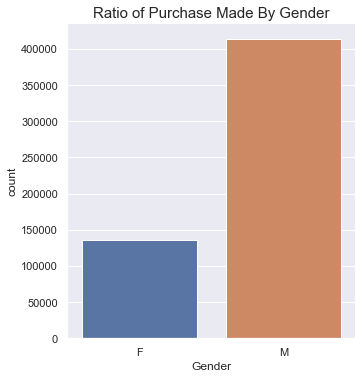

In [17]:
sns.set(style= "darkgrid")
sns.catplot(x="Gender", kind="count",data=Data);
plt.title('Ratio of Purchase Made By Gender', size =15)

### MISSING VALUE TREATMENT

In [18]:
df2 = Data.copy()

In [19]:
## Replacing the missing values in Product_category 2 and 3 
df2['Product_Category_2'] =df2['Product_Category_2'].fillna(999).astype('int64')
df2['Product_Category_3'] =df2['Product_Category_3'].fillna(999).astype('int64')

In [20]:
# removing special characters, like (+) in Stay_In_Current_City_Years column
df2['Stay_In_Current_City_Years'] =df2.Stay_In_Current_City_Years.replace('4+', 4)
df2['Stay_In_Current_City_Years']=df2['Stay_In_Current_City_Years'].astype(int)

In [21]:
##Handling categorical feature Gender
df2['Gender']=df2['Gender'].map({'F':0,'M':1})

In [22]:
## Handle categorical feature Age
df2['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
df2['Age']= label_encoder.fit_transform(df2['Age'])
 
df2['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [24]:
##fixing categorical feature City_category
df2['City_Category']=df2['City_Category'].map({'A':1,'B':2, 'C':3})

In [25]:
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,1,2,0,3,999,999,8370
1,0,0,10,1,2,0,1,6,14,15200
2,0,0,10,1,2,0,12,999,999,1422
3,0,0,10,1,2,0,12,14,999,1057
4,1,6,16,3,4,0,8,999,999,7969


In [26]:
df2.dtypes

Gender                        int64
Age                           int32
Occupation                    int64
City_Category                 int64
Stay_In_Current_City_Years    int32
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int64
Product_Category_3            int64
Purchase                      int64
dtype: object

## outlier treatment

In [27]:
df2.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, .1, .25,.5,.75, .9,.95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Gender,550068.0,0.753105,0.431205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0
Age,550068.0,2.496430,1.353632,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,5.0,5.0,6.0,6.00,6.0,6.0
Occupation,550068.0,8.076707,6.522660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,14.0,17.0,20.0,20.0,20.0,20.00,20.0,20.0
City_Category,550068.0,2.042640,0.760211,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.00,3.0,3.0
Stay_In_Current_City_Years,550068.0,1.858418,1.289443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.00,4.0,4.0
Marital_Status,550068.0,0.409653,0.491770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0
Product_Category_1,550068.0,5.404270,3.936211,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,8.0,11.0,13.0,15.0,16.0,16.00,18.0,20.0
Product_Category_2,550068.0,322.086197,459.761105,2.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,14.0,999.0,999.0,999.0,999.0,999.0,999.00,999.0,999.0
Product_Category_3,550068.0,699.871801,453.395520,3.0,5.0,5.0,5.0,6.0,8.0,12.0,16.0,999.0,999.0,999.0,999.0,999.0,999.0,999.00,999.0,999.0
Purchase,550068.0,9263.968713,5023.065394,12.0,587.0,954.0,1574.0,1789.0,1984.0,3540.0,5823.0,8047.0,12054.0,16317.0,19336.0,19480.0,19628.0,20202.66,20665.0,23961.0


In [28]:
df2.mean() + 3*df2.std()

Gender                            2.046721
Age                               6.557324
Occupation                       27.644688
City_Category                     4.323272
Stay_In_Current_City_Years        5.726745
Marital_Status                    1.884963
Product_Category_1               17.212904
Product_Category_2             1701.369513
Product_Category_3             2060.058361
Purchase                      24333.164894
dtype: float64

No outliers present in the data

## Correlation matrix

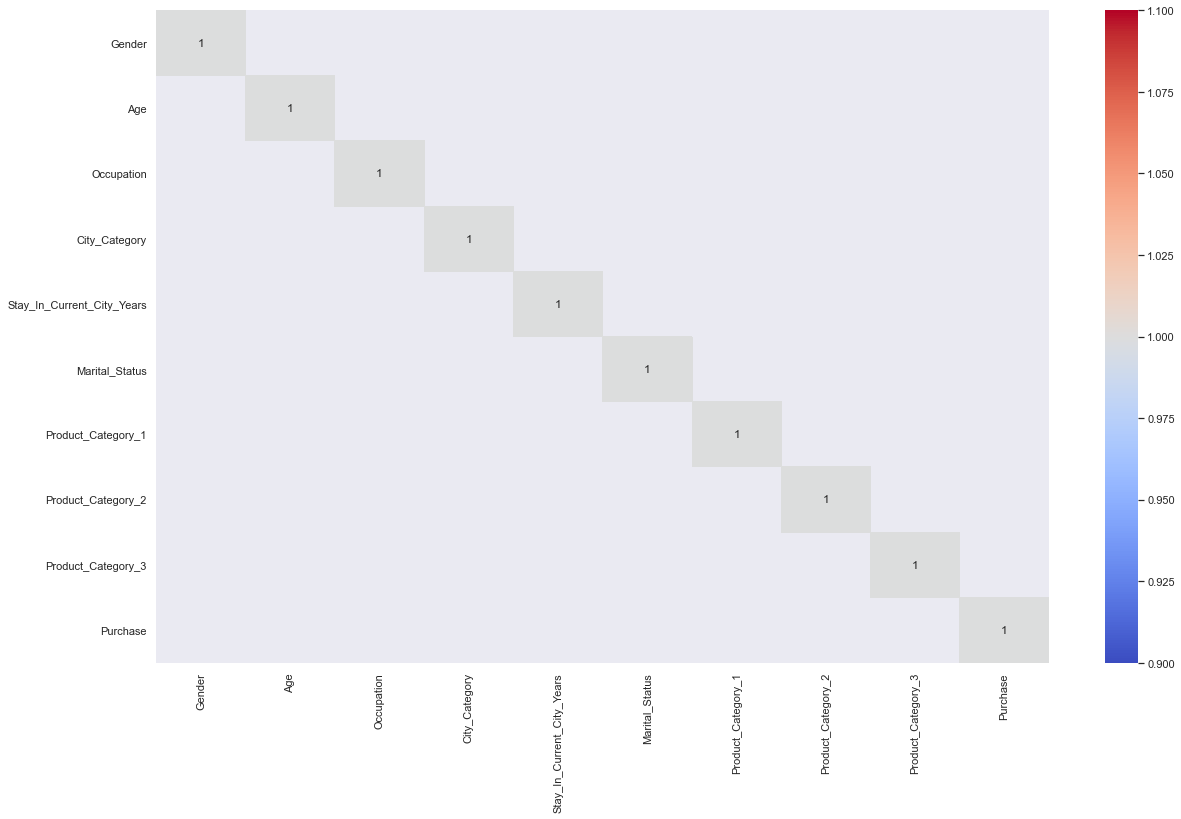

In [29]:
corr_matrix = df2.corr() 
#filter correlation values above 0.5
filter_corr = corr_matrix[corr_matrix > 0.5]
#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,
            cmap='coolwarm',
            annot=True);

No multicollinearity in the data

C:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

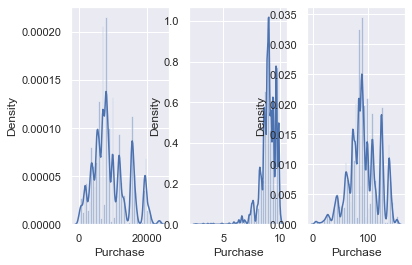

In [30]:
plt.subplot(131)
sns.distplot(df2["Purchase"])

plt.subplot(132)
sns.distplot(np.log(df2["Purchase"]))

plt.subplot(133)
sns.distplot(np.sqrt(df2["Purchase"]))

plt.show()

Normal distribution is not followed in the data so we cannot use linear regression as the error will be very big.

#### ALGORITHM - LINEAR REGRESSION

In [31]:
#Splitting the DATA
y=df2["Purchase"]
X=df2.drop(columns=["Purchase"])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
X_train , X_test, y_train , y_test=train_test_split(X,y, test_size=0.3, random_state=70)

In [38]:
LR = LinearRegression()

In [39]:
LR.fit(X_train, y_train)

LinearRegression()

In [40]:
print(" LR Train Score :", LR.score(X_train, y_train))
print("LR Test Score :", LR.score(X_test, y_test))

 LR Train Score : 0.1572864174813834
LR Test Score : 0.15795422729668973


In [41]:
y_pred_train=LR.predict(X_train)
y_pred_train

array([11084.19265494,  8236.51524425,  9747.45123624, ...,
        5295.17794962,  7868.3225426 ,  7409.2410985 ])

In [42]:
y_pred_test=LR.predict(X_test)
y_pred_test

array([ 8390.94289238, 12555.09916021,  9430.30151309, ...,
        8609.69211823,  5840.91403904, 12555.8045685 ])

In [43]:
print("Train MSE :", np.mean((y_train-y_pred_train)**2))
print("Test MSE :", np.mean((y_test-y_pred_test)**2))

Train MSE : 21269503.387116194
Test MSE : 21229726.925213397


In [44]:
print("Train RMSE :", np.sqrt(np.mean((y_train-y_pred_train)**2)))
print("Test RMSE :", np.sqrt(np.mean((y_test-y_pred_test)**2)))

Train RMSE : 4611.887182826158
Test RMSE : 4607.5727802405245


#### ALGORITHM - DECISION TREE [REGRESSOR]

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=70)

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
DtR=DecisionTreeRegressor(random_state=89)

DtR.fit(X_train, y_train)

print("Train Accuracy:", DtR.score(X_train,y_train))
print("Test Accuracy:", DtR.score(X_test,y_test))

Train Accuracy: 0.8021590496851903
Test Accuracy: 0.5615995642682973


In [48]:
DtR=DecisionTreeRegressor(max_depth=10,random_state=89)

DtR.fit(X_train, y_train)

print("Train Accuracy:", DtR.score(X_train,y_train))
print("Test Accuracy:", DtR.score(X_test,y_test))

Train Accuracy: 0.6616284913569943
Test Accuracy: 0.6554002142979675


In [52]:
DtR1=DecisionTreeRegressor(max_depth=10,random_state=89, criterion='squared_error')

DtR1.fit(X_train, y_train)

print("Train Accuracy:", DtR1.score(X_train,y_train))
print("Test Accuracy:", DtR1.score(X_test,y_test))

Train Accuracy: 0.6616284913569943
Test Accuracy: 0.6554002142979675


In [54]:
DtR2=DecisionTreeRegressor(max_depth=10,random_state=70,min_samples_split=2, min_samples_leaf=1,)

DtR2.fit(X_train, y_train)

print("Train Accuracy:", DtR2.score(X_train,y_train))
print("Test Accuracy:", DtR2.score(X_test,y_test))

Train Accuracy: 0.6616284913569943
Test Accuracy: 0.6553976809821043


In [55]:
DtR2=DecisionTreeRegressor(max_depth=10,random_state=70, min_samples_leaf=20 ,min_samples_split=150)

DtR2.fit(X_train, y_train)

print("Train Accuracy:", DtR2.score(X_train,y_train))
print("Test Accuracy:", DtR2.score(X_test,y_test))

Train Accuracy: 0.6600750120170066
Test Accuracy: 0.6565776674713772


#### hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_1 = {'max_depth': [5,10,20],
                'min_samples_split': [50,100,150], 
                "min_samples_leaf" : [5,10,15,20],
                'criterion': ['mse', 'mae']
     
               }

dtr = DecisionTreeRegressor(random_state=70)

dtr_grid = RandomizedSearchCV(dtr, param_grid_1, cv=5, verbose=1, n_jobs=-1)

dtr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
dtr_grid.best_params_

In [ ]:
dtr_grid.best_score_

In [ ]:
DtR3=DecisionTreeRegressor(max_depth=dtr_grid.best_params_['max_depth'], 
                           criterion=dtr_grid.best_params_['criterion'], 
                           min_samples_split=dtr_grid.best_params_['min_samples_split'], 
                           min_samples_leaf=dtr_grid.best_params_['min_samples_leaf'])

DtR3.fit(X_train, y_train)

print("Train Accuracy:", DtR3.score(X_train,y_train))
print("Test Accuracy:", DtR3.score(X_test,y_test))

In [56]:
y_pred_train=DtR2.predict(X_train)
y_pred_train

array([ 6028.65949676, 14063.56037736, 14486.28070175, ...,
       14647.15088168,  7800.57272727,  7461.36706349])

In [57]:
y_pred_test=DtR2.predict(X_test)
y_pred_test

array([ 6805.91034483, 14453.68215054, 13973.54339623, ...,
        7386.10235889, 13744.00860507,  7461.36706349])

In [58]:
print("Train RMSE", np.sqrt(np.mean((y_train-y_pred_train)**2)))
print("Test RMSE", np.sqrt(np.mean((y_test-y_pred_test)**2)))

Train RMSE 2930.5648928622013
Test RMSE 2935.7104112874617


### ALGORITHM - RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
Rf=RandomForestRegressor(max_depth=5, random_state=70)

In [61]:
#help(Rf)

In [62]:
Rf.fit(X_train, y_train)

print("Train Accuracy:", Rf.score(X_train, y_train))
print("Test Accuracy:", Rf.score(X_test,y_test))

Train Accuracy: 0.5802587169640961
Test Accuracy: 0.5806733984786845


In [63]:
Rf1=RandomForestRegressor(max_depth=10, random_state=70, min_samples_split=2, min_samples_leaf=1)
Rf1.fit(X_train, y_train)

print("Train Accuracy:", Rf1.score(X_train, y_train))
print("Test Accuracy:", Rf1.score(X_test,y_test))

Train Accuracy: 0.6650374304866542
Test Accuracy: 0.6593112082875552


In [64]:
rf2=RandomForestRegressor(max_depth=10, random_state=70, min_samples_split=100, min_samples_leaf=1)
rf2.fit(X_train, y_train)
print("Train Accuracy :", rf2.score(X_train,y_train))
print("Test Accuracy :", rf2.score(X_test,y_test))

Train Accuracy : 0.662910380635729
Test Accuracy : 0.6592074125001146


#### hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_1 = {'max_depth': [7,10,15],
                'n_estimators':[25, 50, 100],
                'min_samples_split': [50,100,150,200],
                "min_samples_leaf" : [2,5,10]
     
               }

clf = RandomForestRegressor(random_state=70)

rf_grid = RandomizedSearchCV(clf, param_grid_1, cv=5, verbose=1, n_jobs=-1)

rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
rf3=RandomForestClassifier(n_estimators=rf_grid.best_params_['n_estimators'],
                           max_depth=rf_grid.best_params_['max_depth'], 
                           min_samples_split=rf_grid.best_params_["min_samples_split"]
                           min_samples_leaf=rf_grid.best_params_["min_samples_leaf"]
                            
                          )
rf3.fit(X_train, y_train) 
print("Train Accuracy :", rf3.score(X_train,y_train))
print("Test Accuracy :", rf3.score(X_test,y_test))

In [65]:
y_pred_train=rf2.predict(X_train)
y_pred_train

array([ 6003.53713025, 14002.57669505, 16047.00524336, ...,
       14632.62584307,  7745.00016123,  7426.44298565])

In [66]:
y_pred_test=rf2.predict(X_test)
y_pred_test

array([ 6601.65740251, 14262.63419403, 13257.68874737, ...,
        7430.30055131, 13676.40822949,  7426.44298565])

In [67]:
print("Train RMSE :", np.sqrt(np.mean((y_train-y_pred_train)**2)))
print("Test RMSE :", np.sqrt(np.mean((y_test-y_pred_test)**2)))

Train RMSE : 2918.317144348185
Test RMSE : 2924.4487587667686


### ALGORITHM - XG BOOST

In [68]:
from xgboost import XGBRFRegressor

In [69]:
Xgbr = XGBRFRegressor(learning_rate=1.0, max_depth=7, min_child_weight=45, seed=54)

Xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=7, min_child_weight=45, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=54, reg_alpha=0,
               scale_pos_weight=1, seed=54, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [70]:
print("Train Accuracy:", Xgbr.score(X_train, y_train))
print("Test Accuracy:", Xgbr.score(X_test,y_test))

Train Accuracy: 0.6423165190926423
Test Accuracy: 0.6411072257655315


In [77]:
Xgbr1 = XGBRFRegressor(learning_rate=1.0, max_depth=5, min_child_weight=30, seed=54)

Xgbr1.fit(X_train, y_train)

print("Train Accuracy:", Xgbr1.score(X_train, y_train))
print("Test Accuracy:", Xgbr1.score(X_test,y_test))

Train Accuracy: 0.5376142035354343
Test Accuracy: 0.5384362718745254


In [84]:
Xgbr2 = XGBRFRegressor(learning_rate=1.0, max_depth=10, min_child_weight=40, seed=0, random_state=70)

Xgbr2.fit(X_train, y_train)

print("Train Accuracy:", Xgbr2.score(X_train, y_train))
print("Test Accuracy:", Xgbr2.score(X_test,y_test))

Train Accuracy: 0.6621982062635382
Test Accuracy: 0.658490111297352


#### hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params =  {'max_depth': [2,5,6,10],
            'learning_rate':[0.5,1.0,1.5],
            'seed': [0,2,4],
            'min_child_weight': [20,40,50,100]
     
              }

xgb_reg = XGBRegressor(random_state=89)

xgb_reg_grid = RandomizedSearchCV(xgb_reg, params, cv=5, verbose=1, n_jobs=-1)

xgb_reg_grid.fit(X_train, y_train)

In [ ]:
xgb_reg_grid.best_params_

In [ ]:
xgb_reg_grid.best_score_

In [ ]:
xgb_reg3 = XGBRegressor(learning_rate=xgb_reg_grid.best_params_['learning_rate'],
                     max_depth=xgb_reg_grid.best_params_['max_depth'], 
                     seed=xgb_reg_grid.best_params_['seed'],
                     min_child_weight=xgb_reg_grid.best_params_['min_child_weight'])

xgb_reg3.fit(X_train, y_train)

print("Train Accuaracy:", xgb_reg3.score(X_train, y_train))
print("Test Accuaracy:", xgb_reg3.score(X_test,y_test))

In [85]:
Xgbr_y_Pred_train = Xgbr2.predict(X_train)
Xgbr_y_Pred_train

array([ 6016.985 , 14049.772 , 16029.624 , ..., 14651.767 ,  7680.635 ,
        7450.7715], dtype=float32)

In [86]:
Xgbr_y_Pred_test = Xgbr2.predict(X_test)
Xgbr_y_Pred_test

array([ 6461.0586, 14270.38  , 13317.031 , ...,  7499.8843, 13631.488 ,
        7450.7715], dtype=float32)

In [88]:
print("Train RMSE", np.sqrt(np.mean((y_train-Xgbr_y_Pred_train)**2)))
print("Test RMSE", np.sqrt(np.mean((y_test-Xgbr_y_Pred_test)**2)))

Train RMSE 2921.2250854735585
Test RMSE 2927.4979077703883


## xgboost and random forest are performing very well on this dataset